In [167]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from functools import partial

In [168]:
rng = np.random.default_rng()

In [169]:
mu_1 = np.array([0, 0])
mu_2 = np.array([5, 5])

sigma = np.diag([0.25, 2])

N = 10000

reps = 10000

# Part A

In [170]:
samples = np.array(
    [
        rng.multivariate_normal(mu_1, sigma, size=N),
        rng.multivariate_normal(mu_2, sigma, size=N),
    ]
)

indices = rng.integers(0, 2, size=N)

data = np.array([samples[j, i] for i, j in enumerate(indices)])


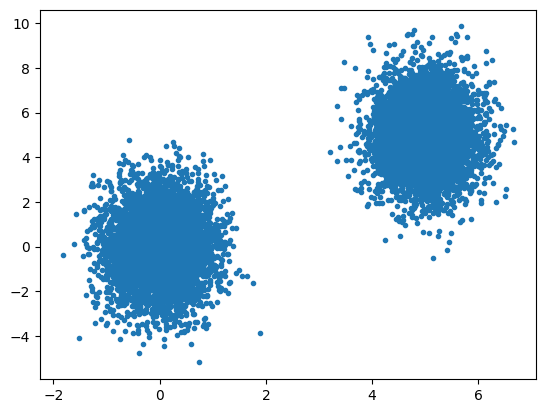

In [171]:
plt.scatter(data[:,0], data[:,1], marker=".")

# Part B

In [187]:
x_current = [2.5, 2.5]
sigma_step = np.identity(2) * 20

x_path = np.zeros((reps, 2))

def pdf(x):
    return 0.5 * (stats.multivariate_normal(mean=mu_1, cov=sigma).pdf(x) + stats.multivariate_normal(mean=mu_2, cov=sigma).pdf(x))

def acceptance_function(x_old, x_new, pdf):
    return rng.random() < min(1, pdf(x_new) / pdf(x_old))


for i in range(reps):
    x_new = rng.multivariate_normal(x_current, sigma_step)

    if acceptance_function(x_current, x_new, pdf):
        x_current = np.copy(x_new)

    x_path[i] = x_current


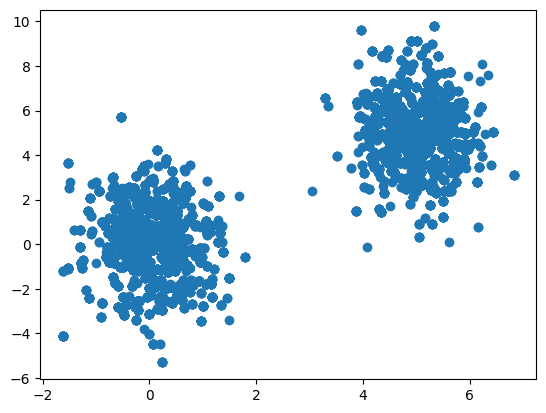

In [188]:
plt.clf()
plt.scatter(x_path[:,0], x_path[:,1])

In [189]:
for A in (x_path, data):
    print(np.mean(A, axis=0))

print(f"Histogram Mean: {np.round(np.mean(data, axis=0), 2)}")
print(f"MCMC Mean: {np.round(np.mean(x_path, axis=0), 2)}")

[2.3520633 2.4079265]
[2.482057   2.48269035]


# Part C

In [193]:
print(f"Expected mean: {np.add(mu_1, mu_2) / 2}")
print(f"MCMC Mean: {np.round(np.mean(x_path, axis=0), 2)}")
print(f"Histogram standard deviation: {np.round(np.std(data, axis=0), 2)}")
print(f"MCMC standard deviation: {np.round(np.std(x_path, axis=0), 2)}")

Expected mean: [2.5 2.5]
MCMC Mean: [2.35 2.41]
Histogram standard deviation: [2.55 2.86]
MCMC standard deviation: [2.53 2.94]
